In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("data/dataClustering.csv", delimiter=',')

In [3]:
np.shape(data)

(2500, 8)

Elbow Method to Determine the Optimal Number of Clusters

In [4]:
test_k = list(range(1, 11))
wcss = []

In [5]:
for k in range(1, 11):
    model = KMeans(n_clusters=k, max_iter=500).fit(data)
    wcss.append(model.inertia_)

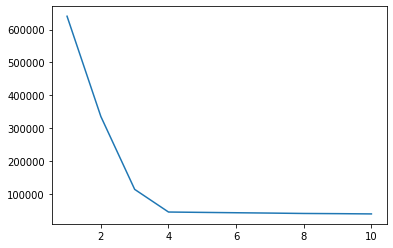

In [6]:
plt.figure()
plt.plot(test_k, wcss)

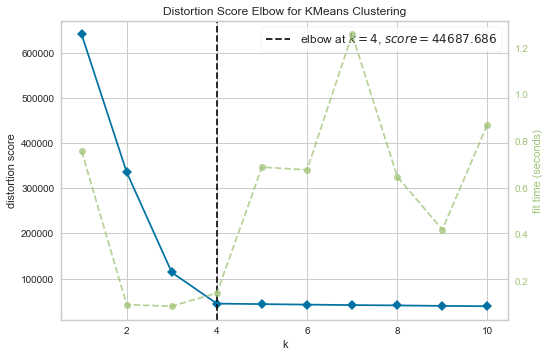

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
## double check with another code
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
viz = KElbowVisualizer(model, k=(1,11))

viz.fit(data)
viz.show()

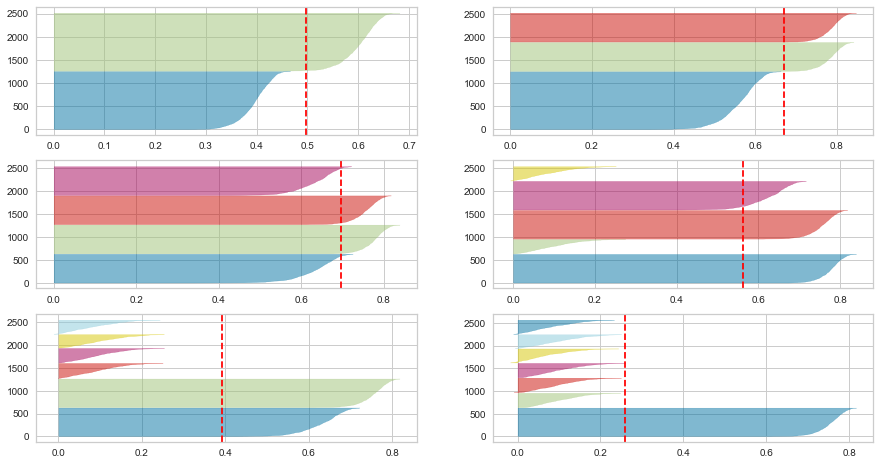

In [8]:
#silhouette method to find optimal k in a different way
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))

for i in [2, 3, 4, 5, 6, 7]:

    km = KMeans(n_clusters=i, max_iter=500)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data) 

Q1. i. 

With K-means clustering, the optimal number of clusters seem to be 4. This is where the WCSS curve shows less decrease in WCSS in the Elbow Plot. The Silhouette Score also indicates that when $k = 4$, all the clusters have Silhouette Score than the average score from the original data set

In [10]:
model = KMeans(n_clusters=4, max_iter=500).fit(data)
labels = model.labels_

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [13]:
model_mlr = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', max_iter = 500)
%timeit model_mlr.fit(X_train, y_train)

model_svm = SVC(max_iter = 500, C=10)
%timeit model_svm.fit(X_train, y_train)

y_pred_MLR = model_mlr.predict(X_test)
y_pred_SVM = model_svm.predict(X_test)

print("MLR Accuracy: ", metrics.accuracy_score(y_test, y_pred_MLR))
print("SVM Accuracy: ", metrics.accuracy_score(y_test, y_pred_SVM))

228 ms ± 18.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
19.8 ms ± 1.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
MLR Accuracy:  1.0
SVM Accuracy:  1.0


In [14]:
model_knn = KNeighborsClassifier(n_neighbors=50)
%timeit model_knn.fit(X_train, y_train)

y_pred_KNN = model_knn.predict(X_test)
print("KNN Accuracy: ", metrics.accuracy_score(y_test, y_pred_KNN))


5.27 ms ± 275 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
KNN Accuracy:  1.0


Q1. ii. 

All models give 100% accuracy when we split the data to $70\%$ training set and $30\%$ test set. The $2500$ samples were first assigned clusters based on K-Means and then we split into training and testing from there. We then used each model (MLR, SVM, and KNN) to train on the training set and then compare the predictions it gave on the test set with the actual labels. All models gave $100\%$ accuracy. However, in terms of compute time, KNN took less time to fit the model compared to SVM and lot faster compared to MLR. Therefore, KNN seems to be slightly better for this dataset in terms of compute time. One potential reason for this is that SVM is not inherently a multi-class identifier. It rather uses one-vs.-rest strategy to classify, making it multiple binary classification problems. 